# SP primer design

## 0 Introduction
Investigation of the predicted (SignalP) and synthetic (AutoML) signal peptide sequences requires testing under lab conditions to measure the peptide abundances. In order to achieve this, an experimental design needs to be structured and set of primers should be constructed for the insertion of the desired signal peptide sequences into the chromosome of the _A. oryzae_ RIB40


### Agenda:
- Isolate the top 10-15 signalP sequences 
- Construct primers to insert singalP sequences 
- Generate function to automate nucleotide-to-primer design
- Run pytest to check for function failures

In [2]:
import pandas as pd
from IPython.display import Image
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# 0 Genetic design

In [6]:
# For making the genetic construct figure 
import dnaplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import IPython.core.display


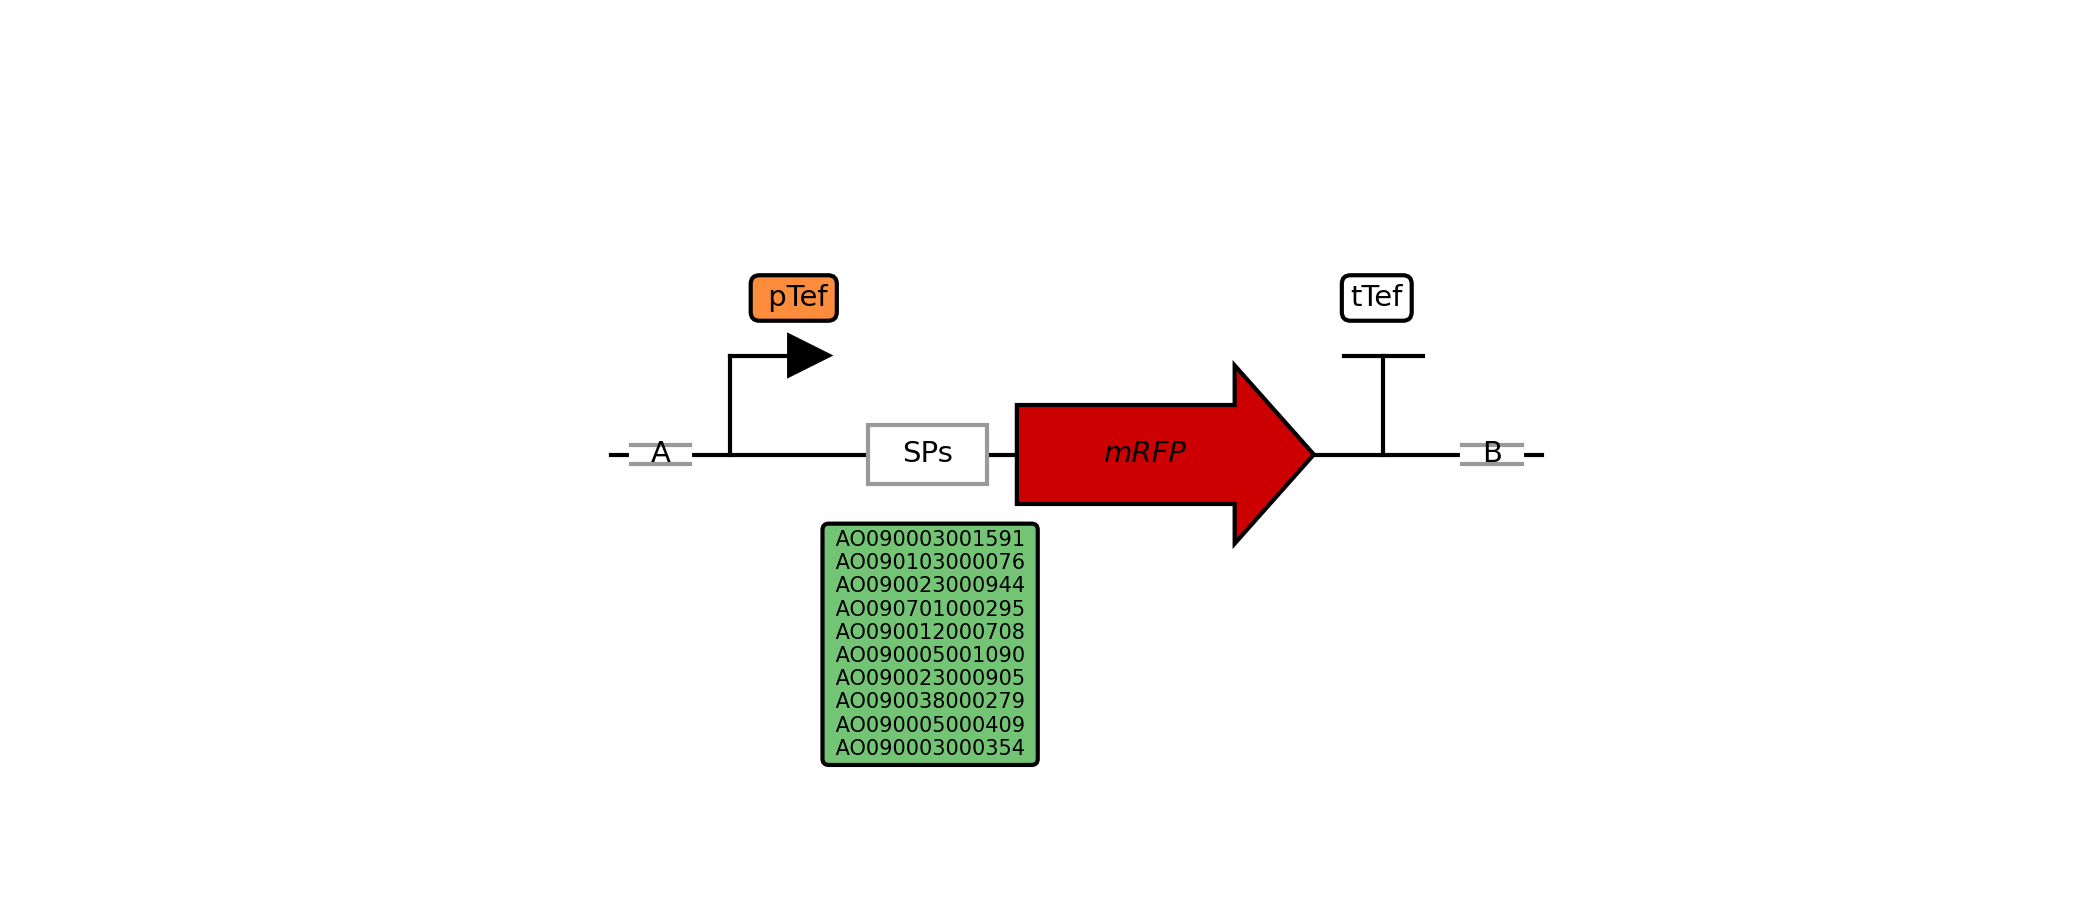

In [103]:
a = {'name':'A', 'start':-41, 'end':-55, 'type':'Scar', 'opts':{'label': 'A',  'label_y_offset': 0, 'label_x_offset': 0,  'color':[0.60,0.60,0.60]}}
ptef = {'name':'P_tef', 'start':50, 'end':65, 'type':'Promoter', 'opts': {'color':[0.00,0.00,0.00]}}
sp = {'name':'sp', 'start':-41, 'end':-55, 'type':'UserDefined', 'opts':{'label': 'SPs',  'label_y_offset': 0, 'label_x_offset': 0,  'color':[0.60,0.60,0.60]}}
rfp = {'name':'mRFP', 'start':76, 'end':95, 'type':'CDS', 'opts':{'label': 'mRFP', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': -2, 'label_style':'italic', 'color':'#CC0000'}} # 0.79,0.70,0.84
ttef = {'name':'TTef', 'start':96, 'end':110, 'type':'Terminator'}
b = {'name':'B', 'start':-41, 'end':-55, 'type':'Scar', 'opts':{'label': 'B',  'label_y_offset': 0, 'label_x_offset': 0,  'color':[0.60,0.60,0.60]}}

plt.figure(figsize=(7, 3),dpi=300)
gs = gridspec.GridSpec(1, 1)

# Plot genetic construct
ax = plt.subplot(gs[0])
dnaplotlib.plot_sbol_designs([ax], [[a ,  ptef, sp, rfp, ttef, b]])

#### Plot text
# terminator
plt.text(80,15, 'tTef', ha='right', rotation=0, wrap=True,  size = 7,
         # adds box
        bbox=dict(boxstyle="round",facecolor='white'))

# promoter
plt.text(15,15, ' pTef', ha='left', rotation=0, wrap=True,  size = 7,
         # adds box
        bbox=dict(boxstyle="round",facecolor='#fd8d3c'))

# SPs
plt.text(22,-30, ' AO090003001591 \n AO090103000076 \n AO090023000944 \n AO090701000295 \n AO090012000708 \n AO090005001090 \n AO090023000905 \n AO090038000279 \n AO090005000409 \n AO090003000354', ha='left', rotation=0, wrap=True,  size = 5,
        bbox=dict(boxstyle="round",facecolor='#74c476'))


name = 'Genetic_construct_for_signal_peptide_project'
plt.savefig('../pictures/'+name+'.png',format = 'png',  dpi = 300)
IPython.core.display.Image('../pictures/Genetic_construct_for_signal_peptide_project.png', width=1000)

Basically we have to incorporate the SPs into the above shown construct. That we will do by amplplyfying each side of of the fragment with homology regions made up of the the signal peptides. 

## 1 Primer design

In [56]:
path_to_cds_file = '/Users/lucaslevassor/projects/Signal_peptide_project/data/00_A_oryzae_genome_and_partitions/a_oryze_genome_and_partitions/FungiDB-63_AoryzaeRIB40_AnnotatedCDSs.fasta'  

# Create an empty lists to hold annotated coding sequences (CDSs)
cds_seqrecords = []

# Open file with "with" statement to avoid problems with access 
with open(path_to_cds_file , mode='r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):

        # Extract individual parts of the FASTA record
        identifier = record.id
        description = record.description
        sequence = record.seq
        # append the CDs into the empty list
        cds_seqrecords.append(record)

cds_seqrecords[0]

SeqRecord(seq=Seq('ATGCTAATCTCATCAGTGGCGAAGGATGGCTATGGGAAAGACATCTGGACCCTC...TAG'), id='AO090005000001-T', name='AO090005000001-T', description='AO090005000001-T | organism=Aspergillus_oryzae_RIB40 | product=protein of unknown function | location=Chr1_A_oryzae_RIB40:6423868-6424804(+) | length=937 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[])

In [57]:
# Load the latest form of the singalP dataset
df_signalP = pd.read_csv('/Users/lucaslevassor/projects/Signal_peptide_project/data/03_proteomics_data/signalP_common_peptides_wo_NaN.csv')
df_signalP['length'] = df_signalP['Peptide sequences'].apply(len)

# Filter the acccessions which are 22 bp or shorter and isolate the top 25 values
df_signalP_filtered = df_signalP[df_signalP["length"] <= 22]
top_signalP = df_signalP_filtered.head(10).reset_index(drop=True)
top_signalP

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized),Unnamed: 0,start_pos,end_pos,Propability for correct peptide identification,Peptide sequences,max_abundance,length
0,AO090003001591,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000,954,0,22,0.999866,MMVAWWSLFLYGLQVAAPALAA,1.047763e+10,22
1,AO090103000076,0.700000,0.430035,472.900000,0.430035,1.496427e+06,0.000144,1.202415e+09,0.339312,3060,0,20,0.999835,MLRVSAIFMACLLLATAAPT,1.202415e+09,20
2,AO090023000944,250.433333,0.044270,53.733333,0.044270,2.632887e+08,0.025062,7.327970e+07,0.017628,1194,0,22,0.999845,MMVAWWSLFLYGLQVAAPALAA,2.632887e+08,22
3,AO090701000295,25.100000,0.057768,64.266667,0.057768,8.256355e+07,0.007850,2.593517e+08,0.071338,2013,0,19,0.999790,MHLPTLVTLACMAVSASAF,2.593517e+08,19
4,AO090012000708,10.500000,0.107206,117.466667,0.107206,1.564901e+07,0.001493,2.093152e+08,0.060200,1494,0,19,0.999861,MKISAAISTALLAVSAAAF,2.093152e+08,19
5,AO090005001090,79.666667,0.020029,23.400000,0.020029,2.068820e+08,0.019565,7.587098e+07,0.019066,222,0,20,0.999811,MYFNYAAATLAALLPLCSAQ,2.068820e+08,20
6,AO090023000905,94.100000,0.031471,37.533333,0.031471,1.906292e+08,0.018059,9.725510e+07,0.023556,1182,0,19,0.999839,MFIKYALPALAAAQAVFAA,1.906292e+08,19
7,AO090038000279,50.966667,0.019900,25.933333,0.019900,1.372809e+08,0.012766,9.172335e+07,0.019407,2454,0,20,0.999803,MRTAGLLSLLLAAIPAVTAE,1.372809e+08,20
8,AO090005000409,80.000000,0.098956,121.066667,0.098956,6.198183e+07,0.005919,1.244136e+08,0.029343,105,0,20,0.999745,MKFNAVALTLATAGSLVAGQ,1.244136e+08,20
9,AO090003000354,8.533333,0.261239,291.066667,0.261239,1.837025e+06,0.000178,7.771313e+07,0.021945,714,0,16,0.999792,MRSLLWASLLSGVLAG,7.771313e+07,16


In [58]:
# Isolate a list of the first 25 accessions
top_signalP_accessions = top_signalP["Accession"].tolist()
print(top_signalP_accessions)

['AO090003001591', 'AO090103000076', 'AO090023000944', 'AO090701000295', 'AO090012000708', 'AO090005001090', 'AO090023000905', 'AO090038000279', 'AO090005000409', 'AO090003000354']


In [59]:
# Create an empty list to hold matching SeqRecords
top_cds_seqrecords = []
# Loop through all SeqRecords in the dataset
for acc in top_signalP_accessions:
    # Check if the ID matches one of the accessions
    for seqrecord in cds_seqrecords:
        # If there's a match, add the SeqRecord to the list
        if seqrecord.id.split('-')[0] == acc:
            top_cds_seqrecords.append(seqrecord)

len(top_cds_seqrecords[0])

1500

In [60]:
from Bio import SeqIO

# Determine the length of the nucleotide sequences from peptide sequence length
top_protein_length = top_signalP["length"]
top_nucleotide_length = list(top_protein_length*3)

# Generate new nucleotide sequences and create new SeqRecord objects
top_signalP_cds_seqrecords = []

for i, seqrecord in enumerate(top_cds_seqrecords):
    seq = str(seqrecord.seq)
    new_seq = seq[:top_nucleotide_length[i]]
    new_seq_record = SeqIO.SeqRecord(seq=new_seq, id=f"{seqrecord.id}", description=f"{seqrecord.description} | trimmed_sp_nucleotide_sequence")
    top_signalP_cds_seqrecords.append(new_seq_record)

# The resulting list `top25_transcript_records` contains the modified SeqRecord objects
top_signalP_cds_seqrecords[:3]

[SeqRecord(seq='ATGATGGTCGCGTGGTGGTCTCTATTTCTGTACGGCCTTCAGGTCGCGGCACCTGCTTTGGCTGCA', id='AO090003001591-T', name='<unknown name>', description='AO090003001591-T | organism=Aspergillus_oryzae_RIB40 | product=Alpha-amylase involved in starch hydrolysis | location=Chr2_A_oryzae_RIB40:5385776-5387819(+) | length=2044 | sequence_SO=chromosome | SO=protein_coding_gene | trimmed_sp_nucleotide_sequence', dbxrefs=[]),
 SeqRecord(seq='ATGCTTCGTGTCTCTGCTATCTTCATGGCCTGCCTCCTTCTGGCTACCGCTGCCCCCACC', id='AO090103000076-T', name='<unknown name>', description='AO090103000076-T | organism=Aspergillus_oryzae_RIB40 | product=protein of unknown function | location=Chr8_A_oryzae_RIB40:1060893-1061642(+) | length=750 | sequence_SO=chromosome | SO=protein_coding_gene | trimmed_sp_nucleotide_sequence', dbxrefs=[]),
 SeqRecord(seq='ATGATGGTCGCGTGGTGGTCTCTATTTCTGTACGGCCTTCAGGTCGCGGCACCTGCTTTGGCTGCA', id='AO090023000944-T', name='<unknown name>', description='AO090023000944-T | organism=Aspergillus_oryzae_RIB40 

## 2 Nucleotide-to-primer function

Lets convert the entire process into a function and save as a .py (primer_design.py)

In [61]:
"""Function used to generate forward and reverse primers from positive strand nucleotide sequences"""
import pandas as pd
from typing import List
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq


def generate_primers(nucleotide_sequences: List[SeqRecord or str], up_homology_arm: str = None,
                                  down_homology_arm: str = None, nucleotide_homology: int = None) -> pd.DataFrame:
    """
    This function generates sequencing-ready forward and reverse primers by processing a list of String or SeqRecords nucleotide sequences 
    defined in 5´ to 3´ direction from the positive (top) strand of the nucleotide sequence to be expressed. 
        The process consists of several steps including:
            1. Addition of up and down homology/repair arms to the nucleotide sequence to create homology with the bakcbone sequenece
            2. Division of the nucleotide sequence into equal halves while preserving codon structure
            3. Sharing defined number of sequences between the nucleotide sequence halves to create matching homology between them
            4. Construction of reverse complement ( 5´ to 3´ direction) sequence of the forward primer on the negative (bottom) strand 
            5. Calculation of the forward and reverse primer lengths
            5. Construction of a dataframe to summarize forward and reverse primers and their lengths

    Parameters:
    -----------
        nucleotide_sequenceuences: str or list of Bio.SeqReccord.SeqRecord
            A list of String or SeqRecords nucleotide sequences defined in 5´ to 3´ direction from the positive (top) strand
        
        up_homology_arm: str
            A string representing nucleotide sequence to be added to the beginning of the forward primer to create homology with the bakcbone sequenece
        
        down_homology_arm: str
            A string representing nucleotide sequence to be added to the end of the reverse primer to create homology with the bakcbone sequence
        
        nucleotide_homology: int
            An integer representing the number of nucleotides that should be shared between the halves of the nucleotide sequence to create homology between them
        

    Returns:
    --------
        A pandas dataframe with forward and reverse primer sequnces and their respective primer lengths.
    """
    # Extract the sequencecs if they are provided as SeqRecord 
    extracted_sequences = []
    
    for sequence in nucleotide_sequences:
        if isinstance(sequence, SeqRecord):
            nucleotide_sequence = str(sequence.seq)
        elif isinstance(sequence, str):
            nucleotide_sequence = sequence
        else:
            raise TypeError(f"Expected SeqRecord, Seq object or string, but got {type(sequence)}")

        # Check if the sequence contains only nucleotides
        if set(nucleotide_sequence) - set('agtACGT'):
            raise ValueError(f"Sequence {sequence} at index {nucleotide_sequences.index(sequence)} contains non-nucleotide characters.")
        
        # Add up and down homology arms to the nuclceotide sequences (if stated)
        if up_homology_arm and down_homology_arm:
            nucleotide_sequence = up_homology_arm + nucleotide_sequence + down_homology_arm
        else:
            nucleotide_sequence = nucleotide_sequence
        
        # Determine the half of the sequence and divide into two while preseving codon structure 
        sequence_length = len(nucleotide_sequence)
        sequence_midpoint = sequence_length // 2  # Find the midpoint of the sequence

        if sequence_midpoint % 3 != 0:  # Check if sequence_midpoint is not divisible by 3
            codon_position = sequence_midpoint % 3  # Find the position of the last complete codon before the midpoint
            if codon_position <= 1:  # Adjust midpoint to conserve codons
                sequence_midpoint -= codon_position
            else:
                sequence_midpoint += (3 - codon_position)

        up_sequence = nucleotide_sequence[:sequence_midpoint]
        down_sequence = nucleotide_sequence[sequence_midpoint:]
        
        # Create homology arms between halves (up and down) nucleotide sequences and emphasize the homology match by lowercase letters    
        up_seq_homology = up_sequence[-nucleotide_homology:].lower()
        down_seq_homology = down_sequence[:nucleotide_homology].lower()

        up_primer = up_sequence + down_seq_homology
        down_primer = up_seq_homology + down_sequence

        # Define the complementary translation table for nucleotides
        nucleotide_complements = str.maketrans("ATCGatcg", "TAGCtagc")
        complementary_up_primer = up_primer.translate(nucleotide_complements) # Generate complementary strand of the nucleotide sequence (3´ to 5´ on negative strand)
        reverse_complementary_up_primer = complementary_up_primer[::-1] # Take the reverse complement of the complementary strand (write in the direction of 5´ to 3´ on negative strand)
       
        # Emphasize the entire homology section between nucleotide sequences by making them lowercase 
        forward_primer = reverse_complementary_up_primer[:2*nucleotide_homology].lower() + reverse_complementary_up_primer[2*nucleotide_homology:]
        reverse_primer = down_primer[:2*nucleotide_homology].lower() + down_primer[2*nucleotide_homology:]
        names = sequence.id

        extracted_sequences.append((names, forward_primer, len(forward_primer), reverse_primer, len(reverse_primer)))

    df = pd.DataFrame(extracted_sequences, columns=['Names','Forward primer', 'Forward primer length', 'Reverse primer', 'Reverse primer length'])
    return df

In [62]:
up_ha = "CCACAAAACATAACACAACCTTCACC" # Annealing in Ptef 
down_ha = "GCCTCCTCCGAGGACG" # Annealing in RFP
primer_df = generate_primers(nucleotide_sequences=top_signalP_cds_seqrecords, up_homology_arm=up_ha, down_homology_arm=down_ha, nucleotide_homology=9)
primer_df

,Names,Forward primer,Forward primer length,Reverse primer,Reverse primer length
0,AO090003001591-T,ggccgtacagaaatagagACCACCACGCGACCATCATGGTGAAGGT...,63,ctctatttctgtacggccTTCAGGTCGCGGCACCTGCTTTGGCTGC...,63
1,AO090103000076-T,ggcaggccatgaagatagCAGAGACACGAAGCATGGTGAAGGTTGT...,60,ctatcttcatggcctgccTCCTTCTGGCTACCGCTGCCCCCACCGC...,60
2,AO090023000944-T,ggccgtacagaaatagagACCACCACGCGACCATCATGGTGAAGGT...,63,ctctatttctgtacggccTTCAGGTCGCGGCACCTGCTTTGGCTGC...,63
3,AO090701000295-T,aggcgagagtgacaagagTAGGGAGGTGCATGGTGAAGGTTGTGTT...,57,ctcttgtcactctcgcctGCATGGCCGTTAGCGCCAGTGCATTCGC...,60
4,AO090012000708-T,gggcagtagaaatagcagCAGAGATCTTCATGGTGAAGGTTGTGTT...,57,ctgctatttctactgcccTCCTGGCCGTTAGTGCCGCTGCGTTCGC...,60
5,AO090005001090-T,cagctagtgtagctgcagCGTAGTTGAAATACATGGTGAAGGTTGT...,60,ctgcagctacactagctgCACTACTCCCACTATGCTCAGCCCAGGC...,60
6,AO090023000905-T,ccagggcgggaagagcgtATTTAATGAACATGGTGAAGGTTGTGTT...,57,acgctcttcccgccctggCCGCGGCTCAGGCCGTCTTTGCTGCTGC...,60
7,AO090038000279-T,cgagtaaaagagaaagaaGACCAGCGGTACGCATGGTGAAGGTTGT...,60,ttctttctcttttactcgCAGCGATTCCCGCTGTTACCGCGGAGGC...,60
8,AO090005000409-T,tcgccaaggtgagagcaaCTGCGTTGAACTTCATGGTGAAGGTTGT...,60,ttgctctcaccttggcgaCGGCTGGTTCCCTCGTGGCCGGTCAGGC...,60
9,AO090003000354-T,gcaacgaagcccacaaaaGCGACCTCATGGTGAAGGTTGTGTTATG...,54,ttttgtgggcttcgttgcTTTCGGGCGTGTTGGCTGGGGCCTCCTC...,54


In [63]:
# Convert and save a summary dataframe
save = False # change to "True" to save
if save:
    primer_df.to_excel('../Data/signalP_signalP_primer_list.xlsx', index=False)

# Simulate that the primers work as they should 

In [64]:
from pydna.dseqrecord import Dseqrecord

Lets import the templates we want to amplify

In [65]:
from Bio import SeqIO

RFP = Dseqrecord(SeqIO.read("/Users/lucaslevassor/projects/Signal_peptide_project/data/10_genetic_parts/parts/RFP.fasta", "fasta"))
pTef = Dseqrecord(SeqIO.read("/Users/lucaslevassor/projects/Signal_peptide_project/data/10_genetic_parts/parts/pTEF.fasta", "fasta"))

In [66]:
RFP.seq

Dseq(-693)
GCCT..TTAA
CGGA..AATT

In [67]:
pTef.seq

Dseq(-886)
CGAG..CACC
GCTC..GTGG

In [68]:
from pydna.amplify import pcr
from pydna.primer import Primer


In [69]:
# these are actually the opposite of twhat they say so forward primer is actually reverse primers
forward_primers = [SeqRecord(seq) for seq in primer_df['Forward primer'].to_list()]
reverse_primers = [SeqRecord(seq) for seq in primer_df['Reverse primer'].to_list()]

In [70]:
p1 = Primer("CGAGACAGCAGAATCACCGCCCAAGT")
p2 = Primer(forward_primers[0].seq)
first_pTEF_amplicon = pcr(p1, p2, pTef)

first_pTEF_amplicon

Amplicon(923)

In [71]:
p1

id 26-mer:5'-CGAGACAGCAGAATC..AGT-3'

In [72]:
# pTEF amplicons
pTEF_amplicons = []
# generic primer for pTEF
p1 = Primer("CGAGACAGCAGAATCACCG", name= 'pTef_generic_forward_primer', id ='pTef_generic_forward_primer' )

# Change the name of the primers 
for i in range(len(forward_primers)): 
    forward_primers[i].id = f'pTef_r_{top_signalP_accessions[i]}'


# AMPLIFY
for reverse_primer in forward_primers: 
    amplicon = pcr(p1, Primer(reverse_primer.seq, id=reverse_primer.id), pTef)
    pTEF_amplicons.append(amplicon)

pTEF_amplicons


[Amplicon(923),
 Amplicon(920),
 Amplicon(923),
 Amplicon(917),
 Amplicon(917),
 Amplicon(920),
 Amplicon(917),
 Amplicon(920),
 Amplicon(920),
 Amplicon(914)]

Save the primers 


In [73]:
pTef_primers_to_save = [primer.reverse_primer for primer in pTEF_amplicons]
# THe forward primer is always the same 
pTef_primers_to_save.append(pTEF_amplicons[0].forward_primer)
pTef_primers_to_save


[pTef_r_AO090003001591 63-mer:5'-ggccgtacagaaata..TGG-3',
 pTef_r_AO090103000076 60-mer:5'-ggcaggccatgaaga..TGG-3',
 pTef_r_AO090023000944 63-mer:5'-ggccgtacagaaata..TGG-3',
 pTef_r_AO090701000295 57-mer:5'-aggcgagagtgacaa..TGG-3',
 pTef_r_AO090012000708 57-mer:5'-gggcagtagaaatag..TGG-3',
 pTef_r_AO090005001090 60-mer:5'-cagctagtgtagctg..TGG-3',
 pTef_r_AO090023000905 57-mer:5'-ccagggcgggaagag..TGG-3',
 pTef_r_AO090038000279 60-mer:5'-cgagtaaaagagaaa..TGG-3',
 pTef_r_AO090005000409 60-mer:5'-tcgccaaggtgagag..TGG-3',
 pTef_r_AO090003000354 54-mer:5'-gcaacgaagcccaca..TGG-3',
 pTef_generic_forward_primer 19-mer:5'-CGAGACAGCAGAATCACCG-3']

In [74]:
with open('/Users/lucaslevassor/projects/Signal_peptide_project/data/09_primers/pTef_primers_1.fasta', 'w') as output_file:
    for primer in  pTef_primers_to_save: 
        output_file.write(primer.format('fasta'))

In [75]:
# RFP amplicons
RFP_amplicons = []

# generic reverse primer 
p2 = Primer(Seq('CCATCATCATCATCATCATTAA').reverse_complement(),name= 'RFP_generic_reverse_primer', id ='RFP_generic_reverse_primer' )

# Change the name of the primers 
for i in range(len(forward_primers)): 
    reverse_primers[i].id = f'RFP_f_{top_signalP_accessions[i]}'

for forward in reverse_primers: 
    amplicon = pcr(Primer(forward.seq,id=forward.id), p2, RFP)
    RFP_amplicons.append(amplicon)

RFP_amplicons


[Amplicon(740),
 Amplicon(737),
 Amplicon(740),
 Amplicon(737),
 Amplicon(737),
 Amplicon(737),
 Amplicon(737),
 Amplicon(737),
 Amplicon(737),
 Amplicon(731)]

In [76]:
RFP_primers_to_save = [primer.forward_primer for primer in RFP_amplicons]
# THe reverse primer is always the same 
RFP_primers_to_save.append(RFP_amplicons[0].reverse_primer)
RFP_primers_to_save

[RFP_f_AO090003001591 63-mer:5'-ctctatttctgtacg..ACG-3',
 RFP_f_AO090103000076 60-mer:5'-ctatcttcatggcct..ACG-3',
 RFP_f_AO090023000944 63-mer:5'-ctctatttctgtacg..ACG-3',
 RFP_f_AO090701000295 60-mer:5'-ctcttgtcactctcg..ACG-3',
 RFP_f_AO090012000708 60-mer:5'-ctgctatttctactg..ACG-3',
 RFP_f_AO090005001090 60-mer:5'-ctgcagctacactag..ACG-3',
 RFP_f_AO090023000905 60-mer:5'-acgctcttcccgccc..ACG-3',
 RFP_f_AO090038000279 60-mer:5'-ttctttctcttttac..ACG-3',
 RFP_f_AO090005000409 60-mer:5'-ttgctctcaccttgg..ACG-3',
 RFP_f_AO090003000354 54-mer:5'-ttttgtgggcttcgt..ACG-3',
 RFP_generic_reverse_primer 22-mer:5'-TTAATGATGATGATG..TGG-3']

In [77]:
with open('/Users/lucaslevassor/projects/Signal_peptide_project/data/09_primers/RFP_primers_1.fasta', 'w') as output_file:
    for primer in  RFP_primers_to_save: 
        output_file.write(primer.format('fasta'))

## Check if the amplicons overlap

In [78]:
from pydna.assembly import Assembly

In [79]:
# changing the names of the amplicons
for i in range(len(pTEF_amplicons)):
    pTEF_amplicons[i].name =  f'pTef_{pTEF_amplicons[i].name }_{top_signalP_accessions[i]}'
    
for i in range(len(RFP_amplicons)):
    RFP_amplicons[i].name =  f'RFP_{RFP_amplicons[i].name }_{top_signalP_accessions[i]}'

In [80]:
for i in range(len(RFP_amplicons)): 
    assemblyobj = Assembly([pTEF_amplicons[i],RFP_amplicons[i]], limit = 18)
    contig = assemblyobj.assemble_linear()[0]

    print(contig.figure(), '\n')


pTef_923bp_PCR_prod_AO090003001591|18
                                   \/
                                   /\
                                   18|RFP_740bp_PCR_prod_AO090003001591 

pTef_920bp_PCR_prod_AO090103000076|18
                                   \/
                                   /\
                                   18|RFP_737bp_PCR_prod_AO090103000076 

pTef_923bp_PCR_prod_AO090023000944|18
                                   \/
                                   /\
                                   18|RFP_740bp_PCR_prod_AO090023000944 

pTef_917bp_PCR_prod_AO090701000295|18
                                   \/
                                   /\
                                   18|RFP_737bp_PCR_prod_AO090701000295 

pTef_917bp_PCR_prod_AO090012000708|18
                                   \/
                                   /\
                                   18|RFP_737bp_PCR_prod_AO090012000708 

pTef_920bp_PCR_prod_AO090005001090|18
                      